<h2>PYHTON PROJECT</h2>
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p> The Nobel Prize is perhaps the world's most recognised scientific award. It is awarded annually to scientists and academics in the fields of chemistry, literature, physics, medicine, economics and peace. In this project, we will analyse the Nobel Prize winners within the framework of various questions.</p>
<p> Berna Ersarı</p>

## Project Questions
1. List the top ten countries with the most Nobel Prizes.
2. List the first women to win Nobel Prizes.
3. List the first men to win Nobel Prizes.
4. Visualise from which year onwards the country with the most Nobel Prize winners has dominated and what are the factors that have played a role in this dominance? Can you share your insights?
5. Visualise the gender, age, award category and year of the Nobel Prize winners. (Show a separate graph for each award category) Interpret the visual according to the results.
6. Visualise and interpret the categories and countries of the Nobel Prize winners between 1938-1945.
7. Visualise and interpret the categories and countries of the Nobel Prize winners between 1947-1991.(A separate graph is required for each category)
8. Visualise the countries and ages of people after 2000 in the categories of Chemistry, Literature, Peace, Physics and Medicine. (Separate visualisations are required for each category) Interpret the data.

In [124]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### LOADING THE DATA SET

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
df=pd.read_csv("C:/Users/brnersr/Downloads/nobel.csv")

### OVERVIEW OF THE DATA SET


_GET A GENERAL KNOWLEDGE OF THE DATA SET USING VARIOUS FUNCTIONS_


*_Before any manipulation in the data set, there are 911 records in total. After the evaluation of the null value, the number of records was 883._*

*Let's get a brief preliminary information about the data set with the info() function. Let's determine which variables are important for the questions we will evaluate. Let's also take a quick look at the data types and determine if there are any variables that need to be transformed.*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [5]:
df.shape[0]

911

In [6]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

*Display the empty values and evaluate the result. When we think about the questions, let's identify the empty variables that may negatively affect the results.*

In [7]:
df.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [8]:
df["motivation"]

0      "in recognition of the extraordinary services ...
1      "in special recognition of his poetic composit...
2      "for his work on serum therapy, especially its...
3                                                    NaN
4                                                    NaN
                             ...                        
906    "for his discoveries of mechanisms for autophagy"
907    "for his resolute efforts to bring the country...
908    "for theoretical discoveries of topological ph...
909    "for theoretical discoveries of topological ph...
910    "for theoretical discoveries of topological ph...
Name: motivation, Length: 911, dtype: object

In [9]:
df[df["sex"].isnull()].index

Int64Index([ 24,  60,  89, 200, 215, 237, 238, 283, 348, 349, 366, 399, 479,
            523, 558, 588, 659, 682, 703, 729, 778, 789, 800, 860, 873, 897],
           dtype='int64')

In [10]:
df[df["birth_date"].isnull()].index

Int64Index([ 24,  60,  89, 200, 215, 237, 238, 283, 348, 349, 366, 399, 479,
            523, 558, 588, 659, 682, 703, 729, 778, 789, 800, 816, 850, 860,
            873, 897],
           dtype='int64')

*Let's take a closer look at the data set with any 40 records. What does the information contained in the records mean? Let's see what inferences we can make about the related questions.*

In [11]:
df.sample(40)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
318,1959,Medicine,The Nobel Prize in Physiology or Medicine 1959,"""for their discovery of the mechanisms in the ...",1/2,368,Individual,Arthur Kornberg,1918-03-03,"Brooklyn, NY",United States of America,Male,Stanford University,"Stanford, CA",United States of America,2007-10-26,"Stanford, CA",United States of America
91,1918,Chemistry,The Nobel Prize in Chemistry 1918,"""for the synthesis of ammonia from its elements""",1/1,177,Individual,Fritz Haber,1868-12-09,Breslau (Wroclaw),Prussia (Poland),Male,Kaiser-Wilhelm-Institut (now Fritz-Haber-Insti...,Berlin-Dahlem,Germany,1934-01-29,Basel,Switzerland
818,2009,Chemistry,The Nobel Prize in Chemistry 2009,"""for studies of the structure and function of ...",1/3,843,Individual,Ada E. Yonath,1939-06-22,Jerusalem,British Mandate of Palestine (Israel),Female,Weizmann Institute of Science,Rehovot,Israel,NaN,NaN,NaN
718,2000,Physics,The Nobel Prize in Physics 2000,"""for basic work on information and communicati...",1/2,728,Individual,Jack S. Kilby,1923-11-08,"Jefferson City, MO",United States of America,Male,Texas Instruments,"Dallas, TX",United States of America,2005-06-20,"Dallas, TX",United States of America
493,1978,Physics,The Nobel Prize in Physics 1978,"""for their discovery of cosmic microwave backg...",1/4,112,Individual,Robert Woodrow Wilson,1936-01-10,"Houston, TX",United States of America,Male,Bell Laboratories,"Holmdel, NJ",United States of America,NaN,NaN,NaN
266,1952,Chemistry,The Nobel Prize in Chemistry 1952,"""for their invention of partition chromatography""",1/2,215,Individual,Richard Laurence Millington Synge,1914-10-28,Liverpool,United Kingdom,Male,Rowett Research Institute,Bucksburn (Scotland),United Kingdom,1994-08-18,Norwich,United Kingdom
336,1962,Literature,The Nobel Prize in Literature 1962,"""for his realistic and imaginative writings, c...",1/1,634,Individual,John Steinbeck,1902-02-27,"Salinas, CA",United States of America,Male,NaN,NaN,NaN,1968-12-20,"New York, NY",United States of America
427,1973,Chemistry,The Nobel Prize in Chemistry 1973,"""for their pioneering work, performed independ...",1/2,244,Individual,Ernst Otto Fischer,1918-11-10,Munich,Germany,Male,Technical University,Munich,Federal Republic of Germany,2007-07-23,Munich,Germany
103,1921,Literature,The Nobel Prize in Literature 1921,"""in recognition of his brilliant literary achi...",1/1,590,Individual,Anatole France,1844-04-16,Paris,France,Male,NaN,NaN,NaN,1924-10-12,Saint-Cyr-sur-Loire,France
496,1979,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering research into economic d...",1/2,692,Individual,Theodore W. Schultz,1902-04-30,"Arlington, SD",United States of America,Male,University of Chicago,"Chicago, IL",United States of America,1998-02-26,"Evanston, IL",United States of America


*When is the first record year and the last record year in the data set, let's see in which years there are predominantly record entries.*

In [12]:
df["year"].describe() #We access the information that the first registration for the Nobel Prize was given in 1901.

count     911.000000
mean     1969.201976
std        32.837978
min      1901.000000
25%      1946.000000
50%      1975.000000
75%      1997.000000
max      2016.000000
Name: year, dtype: float64

*In connection with the questions, how many different values are there in which variables in the data set. Let's take a look to evaluate. Let's check with the nununique() function whether there are values that have a numerical appearance but can be categorical.*

In [13]:
cols=[col for col in df.columns]
df[cols].nunique()

year                    113
category                  6
prize                   579
motivation              565
prize_share               4
laureate_id             904
laureate_type             2
full_name               904
birth_date              868
birth_city              601
birth_country           121
sex                       2
organization_name       295
organization_city       181
organization_country     29
death_date              582
death_city              291
death_country            50
dtype: int64

*We can say that the category variable is our main variable on which a lot of comments are requested. It is an important variable. Let's get a general information about it by visualising it.*

In [14]:
df["category"].unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [17]:
df_=df.groupby("category").agg({"laureate_id":"count"}).sort_values(by="laureate_id",ascending=False)
df_=df_.reset_index()
df_=df_.rename(columns={"category":"Nobel Award Category","laureate_id": "Total Number of Awards"})
df_

,Nobel Award Category,Total Number of Awards
0,Medicine,211
1,Physics,204
2,Chemistry,175
3,Peace,130
4,Literature,113
5,Economics,78


<Axes: xlabel='category', ylabel='count'>

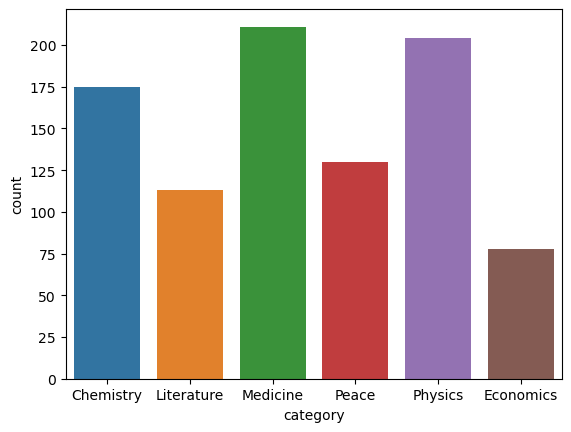

In [15]:
sns.countplot(x=df["category"],data=df)

In [18]:
df["category"].value_counts()*100/883

Medicine      23.895810
Physics       23.103058
Chemistry     19.818800
Peace         14.722537
Literature    12.797282
Economics      8.833522
Name: category, dtype: float64

*The most awarded categories are Medicine, Physics and Chemistry.*

In [19]:
df["prize_share"].unique()

array(['1/1', '1/2', '1/4', '1/3'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

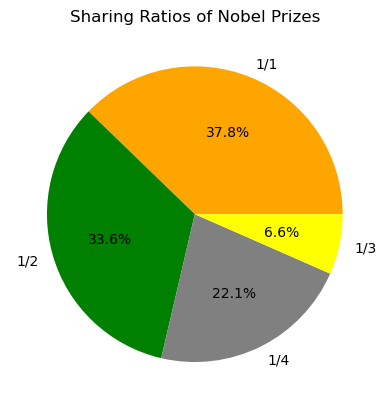

In [20]:
plt.pie(df["prize_share"].value_counts(), labels=df["prize_share"].unique(),colors=['orange', 'green', 'gray', 'yellow'],autopct='%1.1f%%')
plt.title("Sharing Ratios of Nobel Prizes")
plt.show

In [21]:
df["laureate_type"].unique()

array(['Individual', 'Organization'], dtype=object)

In [22]:
df["sex"].value_counts()

Male      836
Female     49
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

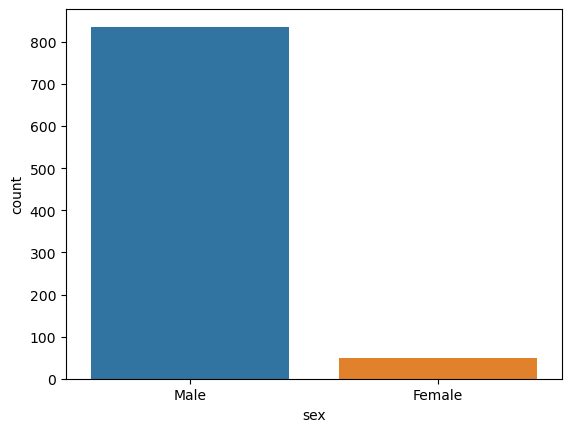

In [22]:
sns.countplot(x=df["sex"],data=df)

In [23]:
df["sex"].value_counts()*100/883

Male      94.677237
Female     5.549264
Name: sex, dtype: float64

*As a percentage, 95 per cent of men and 5 per cent of women were awarded the Nobel Prize.*

Comment:-Gender-

According to this conclusion, women should be encouraged to work in the "STEM" field.

In [24]:
df[df["sex"] == "Female"].groupby("category")["category"].count().sort_values(ascending=False)

category
Peace         16
Literature    14
Medicine      12
Chemistry      4
Physics        2
Economics      1
Name: category, dtype: int64

In [25]:
df[df["sex"] == "Male"].groupby("category")["category"].count().sort_values(ascending=False)

category
Physics       202
Medicine      199
Chemistry     171
Literature     99
Peace          88
Economics      77
Name: category, dtype: int64

*Women received the most awards in the peace category; men received the most awards in the physics category.*

In [36]:
df["age"].describe()

count    883.000000
mean      59.453001
std       12.399290
min       17.000000
25%       50.000000
50%       60.000000
75%       69.000000
max       90.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

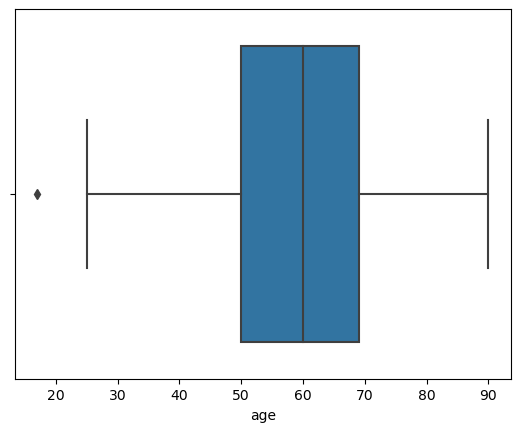

In [35]:
sns.boxplot(x=df["age"], data=df)

Comment:-Age- 

According to the graph above, most of the awardees are middle-aged. Therefore, it is necessary to have experience in the field to receive an award. We can say that people who have worked in the field and have accumulated knowledge and experience have received awards.

In [34]:
df[df["age"]<20]["category"].value_counts()

Peace    1
Name: category, dtype: int64

In [33]:
df[df["age"]<50]["category"].value_counts()

Physics       79
Medicine      55
Chemistry     42
Peace         21
Literature     9
Name: category, dtype: int64

### DATA PREPARATION-DATA PRE-PROCESSING

_DATA TYPE CONVERSION-DELETING EMPTY VALUES AND CREATING NEW VARIABLES_

*It is requested to make an evaluation about age, but the age variable is not in the data set. Let's find this variable by subtracting the date of birth of the person from the date of award. When we look at the records with unknown date of birth, we see that the application type is organisation. The same is true for records where the gender variable is blank. Records with no date of birth will be deleted because age can't be calculated.*

_**Creating a New Variable and Data Type Conversion**_

In [29]:
df["odul_yili"]=df["prize"].str[-4:]


In [30]:
df["dogum_yili"]=df["birth_date"].str[:4]

In [31]:
df["odul_yili"] = pd.to_datetime(df["odul_yili"])
df["dogum_yili"] = pd.to_datetime(df["dogum_yili"])

In [32]:
df["age"]=abs((df["odul_yili"]-df["dogum_yili"]).dt.days//365)

_**Delete Empty Value**_

In [33]:
df=df.dropna(subset=["birth_date"])

*Let's make some checks after data manipulation on the data set*

In [37]:
df["death_date"].isnull().any()

True

In [38]:
df["birth_date"].isnull().any()

True

In [39]:
df["age"].isnull().any()

True

In [40]:
df.info()

#If we make the data type conversion of the year variable date time, it takes the record as timestamp 1970. 
#There is no need for data type conversion of this variable since there is no harm in keeping this variable as a numeric variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  911 non-null    int64         
 1   category              911 non-null    object        
 2   prize                 911 non-null    object        
 3   motivation            823 non-null    object        
 4   prize_share           911 non-null    object        
 5   laureate_id           911 non-null    int64         
 6   laureate_type         911 non-null    object        
 7   full_name             911 non-null    object        
 8   birth_date            883 non-null    object        
 9   birth_city            883 non-null    object        
 10  birth_country         885 non-null    object        
 11  sex                   885 non-null    object        
 12  organization_name     665 non-null    object        
 13  organization_city   

In [41]:
df

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,odul_yili,dogum_yili,age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1901-01-01,1852-01-01,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1901-01-01,1839-01-01,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1901-01-01,1854-01-01,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1901-01-01,1828-01-01,73.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1901-01-01,1822-01-01,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,...,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN,2016-01-01,1945-01-01,71.0
907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,...,Male,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01,1951-01-01,65.0
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,...,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN,2016-01-01,1934-01-01,82.0
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,...,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN,2016-01-01,1951-01-01,65.0


## Project Questions and Answers

#### _**1. List the top ten countries with the most Nobel Prizes.**_

In [42]:
q1=df.groupby("birth_country").agg({"year":"count"}).sort_values(by="year",ascending=False).head(10)
q1.reset_index(inplace=True)

*According to this result, the top 10 countries with the most Nobel Prize winners are as follows*

In [43]:
q1

,birth_country,year
0,United States of America,259
1,United Kingdom,85
2,Germany,61
3,France,51
4,Sweden,29
5,Japan,24
6,Canada,18
7,Netherlands,18
8,Italy,17
9,Russia,17


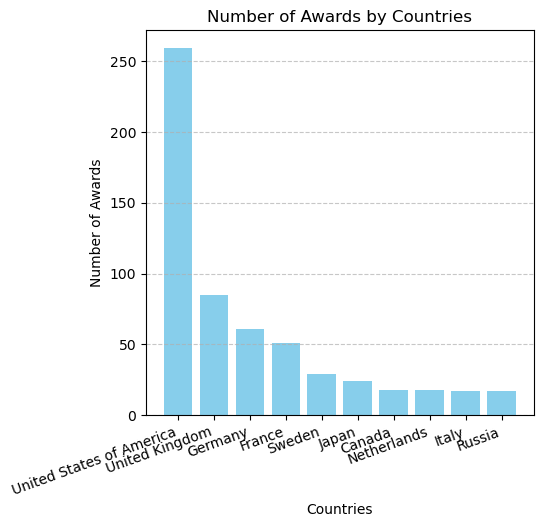

In [44]:
plt.figure(figsize=(5, 5))
plt.bar(q1["birth_country"], q1["year"], color='skyblue')
plt.title('Number of Awards by Countries')
plt.xlabel('Countries')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Number of Awards')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Comment:-Number of Award-

The number of awards in the USA is almost 3 times more than even the UK in 2nd place.

#### _**2. List the first women to win Nobel Prizes.**_

In [45]:
q2=df.loc[df["sex"]=="Female",["category","prize","full_name","birth_country","age"]].head(5)

According to the top 5 records, women from different countries and in different categories have won the Nobel Prize. 

In [40]:
q2 #In the data set, 49 women are seen to have received the Nobel Prize. 10 per cent is taken as a basis for the first women. 

,category,prize,full_name,birth_country,age
19,Physics,The Nobel Prize in Physics 1903,"Marie Curie, née Sklodowska",Russian Empire (Poland),36.0
29,Peace,The Nobel Peace Prize 1905,"Baroness Bertha Sophie Felicita von Suttner, n...",Austrian Empire (Czech Republic),62.0
51,Literature,The Nobel Prize in Literature 1909,Selma Ottilia Lovisa Lagerlöf,Sweden,51.0
62,Chemistry,The Nobel Prize in Chemistry 1911,"Marie Curie, née Sklodowska",Russian Empire (Poland),44.0
128,Literature,The Nobel Prize in Literature 1926,Grazia Deledda,Italy,55.0


In [99]:
df[(df["category"] == "Economics") & (df["sex"] == "Female")].head(1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,odul_yili,dogum_yili,age
819,2009,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for her analysis of economic governance, espe...",1/2,846,Individual,Elinor Ostrom,1933-08-07,"Los Angeles, CA",...,Female,Indiana University,"Bloomington, IN",United States of America,2012-06-12,"Bloomington, IN",United States of America,2009-01-01,1933-01-01,76.0


In [96]:
df[(df["category"] == "Medicine") & (df["sex"] == "Female")].head(10)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,odul_yili,dogum_yili,age
235,1947,Medicine,The Nobel Prize in Physiology or Medicine 1947,"""for their discovery of the course of the cata...",1/4,344,Individual,"Gerty Theresa Cori, née Radnitz",1896-08-15,Prague,...,Female,Washington University,"St. Louis, MO",United States of America,1957-10-26,"St. Louis, MO",United States of America,1947-01-01,1896-01-01,51.0


Comment:
    
In the first years of the Nobel Prizes, Marie Curie won 2 prizes when she was 36 and 44 years old. In the field of economics, prizes started to be awarded in the 1960s. 40 years after the prizes started to be awarded in this field, it is seen that a woman won a prize in the field of economics.

#### _**3. List the first men to win Nobel Prizes.**_

In [48]:
cat_first_win= df.groupby("category").first()
man_first_win= cat_first_win[cat_first_win["sex"] == "Male"]

In [49]:
man_first_win

,year,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,odul_yili,dogum_yili,age
category,,,,,,,,,,,,,,,,,,,,
Chemistry,1901,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1901-01-01,1852-01-01,49.0
Economics,1969,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,677,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Male,University of Oslo,Oslo,Norway,1973-01-31,Oslo,Norway,1969-01-01,1895-01-01,74.0
Literature,1901,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,None,None,None,1907-09-07,Châtenay,France,1901-01-01,1839-01-01,62.0
Medicine,1901,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1901-01-01,1854-01-01,47.0
Peace,1901,The Nobel Peace Prize 1901,"""for his work for peace in Central America, ef...",1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,Sorbonne University,Paris,France,1910-10-30,Heiden,Switzerland,1901-01-01,1828-01-01,73.0
Physics,1901,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany,1901-01-01,1845-01-01,56.0


#### _**4.What are the things that play a role in this dominance by visualising the country that has won the Nobel Prize the most since which year? Can you share your insights?**_ 

Let's find the country with the most prizes.

In [89]:
df.groupby("birth_country").agg({"year":"count"}).sort_values(by="year", ascending=False)

,year
birth_country,
United States of America,259
United Kingdom,85
Germany,61
France,51
Sweden,29
...,...
Gold Coast (Ghana),1
German-occupied Poland (Poland),1
Free City of Danzig (Poland),1


In [50]:
# The United States of America is the country that has won the most Nobel Prizes.

In [51]:
df.loc[df["birth_country"]=="United States of America","year"].tolist()

[1906,
 1912,
 1914,
 1919,
 1923,
 1925,
 1927,
 1929,
 1930,
 1931,
 1931,
 1932,
 1933,
 1934,
 1934,
 1934,
 1934,
 1936,
 1936,
 1937,
 1938,
 1939,
 1943,
 1944,
 1944,
 1945,
 1946,
 1946,
 1946,
 1946,
 1946,
 1946,
 1946,
 1948,
 1949,
 1950,
 1950,
 1950,
 1951,
 1951,
 1952,
 1953,
 1954,
 1954,
 1954,
 1954,
 1954,
 1955,
 1955,
 1956,
 1956,
 1958,
 1958,
 1958,
 1959,
 1959,
 1960,
 1960,
 1961,
 1961,
 1962,
 1962,
 1962,
 1964,
 1964,
 1965,
 1965,
 1965,
 1966,
 1966,
 1967,
 1967,
 1968,
 1968,
 1968,
 1969,
 1969,
 1970,
 1970,
 1970,
 1971,
 1972,
 1972,
 1972,
 1972,
 1972,
 1972,
 1972,
 1972,
 1974,
 1975,
 1975,
 1975,
 1975,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1977,
 1977,
 1977,
 1978,
 1978,
 1978,
 1978,
 1979,
 1979,
 1979,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1981,
 1981,
 1981,
 1982,
 1982,
 1983,
 1983,
 1984,
 1985,
 1985,
 1985,
 1985,
 1986,
 1986,
 1986,
 1987,
 1987,
 1988,
 1988,
 1988,
 1988,
 1989,
 1989,
 1989,
 1989,
 1990,
 1990,

In [52]:
df[df["birth_country"]=="United States of America"].sample(10)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,odul_yili,dogum_yili,age
327,1960,Physics,The Nobel Prize in Physics 1960,"""for the invention of the bubble chamber""",1/1,74,Individual,Donald Arthur Glaser,1926-09-21,"Cleveland, OH",...,Male,University of California,"Berkeley, CA",United States of America,2013-02-28,"Berkeley, CA",United States of America,1960-01-01,1926-01-01,34.0
276,1953,Peace,The Nobel Peace Prize 1953,NaN,1/1,514,Individual,George Catlett Marshall,1880-12-31,"Uniontown, PA",...,Male,NaN,NaN,NaN,1959-10-16,"Washington, DC",United States of America,1953-01-01,1880-01-01,73.0
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,1954-01-01,1901-01-01,53.0
397,1969,Medicine,The Nobel Prize in Physiology or Medicine 1969,"""for their discoveries concerning the replicat...",1/3,392,Individual,Alfred D. Hershey,1908-12-04,"Owosso, MI",...,Male,Carnegie Institution of Washington,"Long Island, New York, NY",United States of America,1997-05-22,"Syosset, NY",United States of America,1969-01-01,1908-01-01,61.0
332,1961,Physics,The Nobel Prize in Physics 1961,"""for his pioneering studies of electron scatte...",1/2,75,Individual,Robert Hofstadter,1915-02-05,"New York, NY",...,Male,Stanford University,"Stanford, CA",United States of America,1990-11-17,"Stanford, CA",United States of America,1961-01-01,1915-01-01,46.0
418,1972,Chemistry,The Nobel Prize in Chemistry 1972,"""for their contribution to the understanding o...",1/4,243,Individual,William H. Stein,1911-06-25,"New York, NY",...,Male,Rockefeller University,"New York, NY",United States of America,1980-02-02,"New York, NY",United States of America,1972-01-01,1911-01-01,61.0
762,2004,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their contributions to dynamic macroecono...",1/2,787,Individual,Edward C. Prescott,1940-12-26,"Glens Falls, NY",...,Male,Arizona State University,"Tempe, AZ",United States of America,NaN,NaN,NaN,2004-01-01,1940-01-01,64.0
470,1976,Physics,The Nobel Prize in Physics 1976,"""for their pioneering work in the discovery of...",1/2,105,Individual,Burton Richter,1931-03-22,"Brooklyn, NY",...,Male,Stanford Linear Accelerator Center,"Stanford, CA",United States of America,NaN,NaN,NaN,1976-01-01,1931-01-01,45.0
439,1974,Chemistry,The Nobel Prize in Chemistry 1974,"""for his fundamental achievements, both theore...",1/1,246,Individual,Paul J. Flory,1910-06-19,"Sterling, IL",...,Male,Stanford University,"Stanford, CA",United States of America,1985-09-08,"Big Sur, CA",United States of America,1974-01-01,1910-01-01,64.0
781,2005,Physics,The Nobel Prize in Physics 2005,"""for their contributions to the development of...",1/4,792,Individual,John L. Hall,1934-08-21,"Denver, CO",...,Male,"University of Colorado, JILA","Boulder, CO",United States of America,NaN,NaN,NaN,2005-01-01,1934-01-01,71.0


In [53]:
#Let's create a separate dataframe about the United States of America and proceed through it.

In [57]:
usa_aw_list=df[df["birth_country"]=="United States of America"]
usa_aw_date_count=usa_aw_list.groupby("year").agg({"birth_country":"count"})
usa_aw_date_count= usa_aw_date_count.rename(columns={'birth_country': 'prize_count'})
usa_aw_date_count.reset_index(inplace=True)

In [ ]:
#number of awards by year

In [58]:
usa_aw_date_count

,year,prize_count
0,1906,1
1,1912,1
2,1914,1
3,1919,1
4,1923,1
...,...,...
80,2012,5
81,2013,5
82,2014,3
83,2015,1


In [59]:
#GRAPH OF NUMBER OF AWARDS BY YEAR-USA

(1900.0, 2020.0)

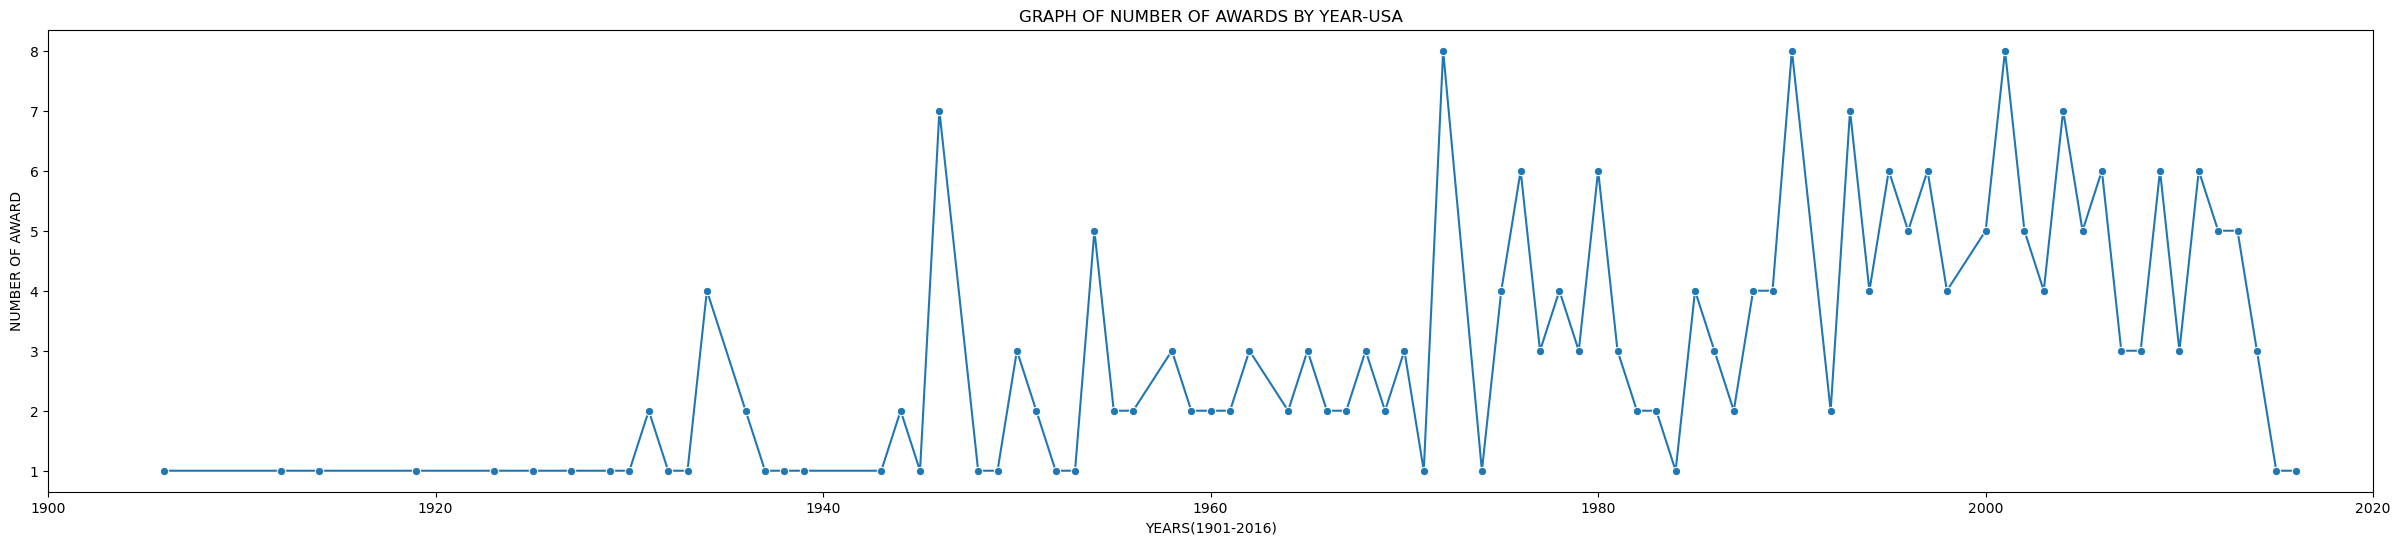

In [119]:
plt.figure(figsize=(30, 6))
sns.lineplot(data=usa_aw_date_count, x='year', y='prize_count', marker='o')
plt.title('GRAPH OF NUMBER OF AWARDS BY YEAR-USA')
plt.xlabel('YEARS(1901-2016)')
plt.ylabel('NUMBER OF AWARD')
plt.xlim(1900, 2020) 

In [129]:
df[(df["year"] >= 1990) & (df["birth_country"] == "United States of America")].count()

year                    118
category                118
prize                   118
motivation              118
prize_share             118
laureate_id             118
laureate_type           118
full_name               118
birth_date              117
birth_city              118
birth_country           118
sex                     118
organization_name       110
organization_city       110
organization_country    111
death_date               31
death_city               31
death_country            31
odul_yili               118
dogum_yili              117
age                     117
dtype: int64

In [63]:
df.loc[(df["year"] <= 1939),["birth_country"]]

,birth_country
0,Netherlands
1,France
2,Prussia (Poland)
3,Switzerland
4,France
...,...
202,Germany
203,Austria-Hungary (Croatia)
204,Russian Empire (Finland)
205,Germany (Poland)


Comment:-Number of Award-USA-

According to the graph above titled "GRAPH OF NUMBER OF AWARDS BY YEAR-USA", America increased its Nobel Prizes especially after World War II. According to the table output below (out63), before the beginning of World War II-1939-USA won some prizes, but between 1930-1940 mostly European countries won prizes. Therefore, the following interpretation can be made. During the 2nd world war, scientists living in Europe took refuge in the USA. Therefore, we can say that the number of awards in the USA increased thanks to European scientists.

#### _**5. Visualise the gender, age, award category and year of the Nobel Prize winners. (Show a separate graph for each award category) Explain the visual according to the results.**_

In [120]:
q5=df.groupby(["category","sex","year"]).agg({"age":"mean"}).round(2)

In [121]:
q5.reset_index(inplace=True)

In [122]:
q5

,category,sex,year,age
0,Chemistry,Female,1911,44.00
1,Chemistry,Female,1935,38.00
2,Chemistry,Female,1964,54.00
3,Chemistry,Female,2009,70.00
4,Chemistry,Male,1901,49.00
...,...,...,...,...
576,Physics,Male,2012,68.00
577,Physics,Male,2013,82.50
578,Physics,Male,2014,66.33
579,Physics,Male,2015,64.00


In [ ]:
#Age Distribution by Each Award Category

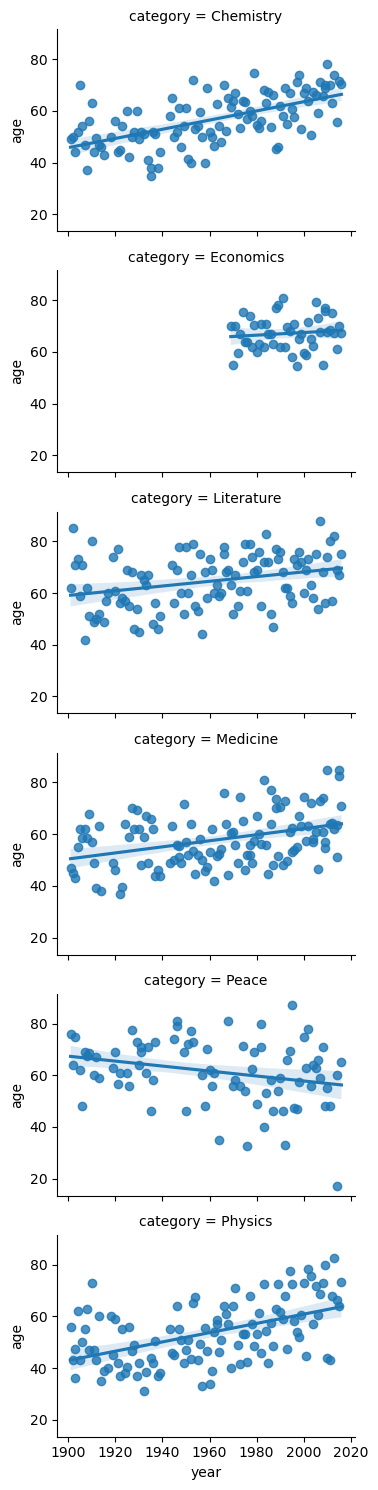

In [73]:
sns.lmplot(x='year', y='age', data=q5, row='category',height=2.5, aspect=1.5)

Comment:-#Age Distribution by Each Award Category-

In the Medicine, Physics and Chemistry categories, the age of the winners tends to increase over the years. This trend may suggest that discoveries in the field of medicine are the result of long-term research, and emphasizes the importance of scientific experience and knowledge. In the peace and literature categories, there is no clear trend in the age of the prize winners, but in general a wider range of ages are recognized. This may indicate that peace work is important in all age groups. In the Economics category, the ages of the prize winners are generally concentrated in a fixed range. It can be argued that awards in the field of economics are concentrated in a certain age group.

In [ ]:
#Award Categories Based on Average Age

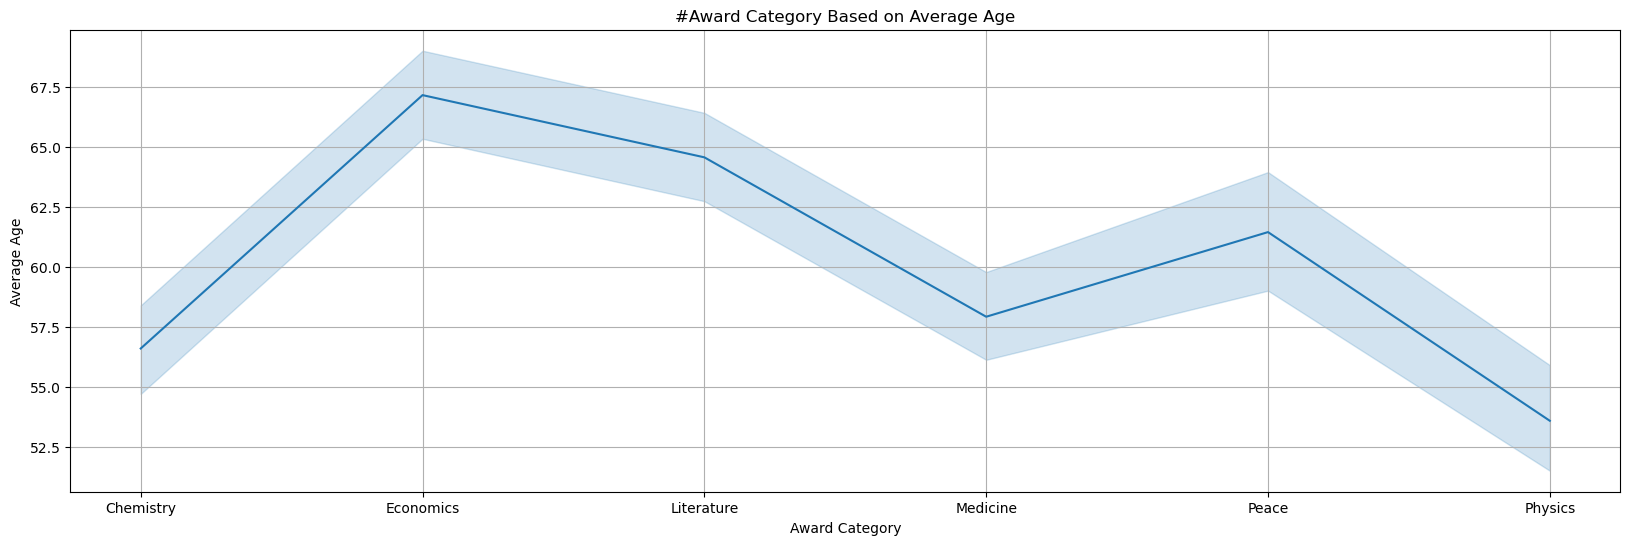

In [74]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=q5, x='category', y='age')
plt.title('#Award Category Based on Average Age')
plt.xlabel('Award Category')
plt.ylabel('Average Age')
plt.grid(True)
plt.show()

In [ ]:
#Award Categories Based on Gender

Comment:-Award Categories Based on Average Age-
    
In general, the average age of award winners in the fields of economics and literature is higher, whereas chemistry and physics are recognized at younger ages. This may indicate that each field inherently has more contributions from individuals of different age groups.

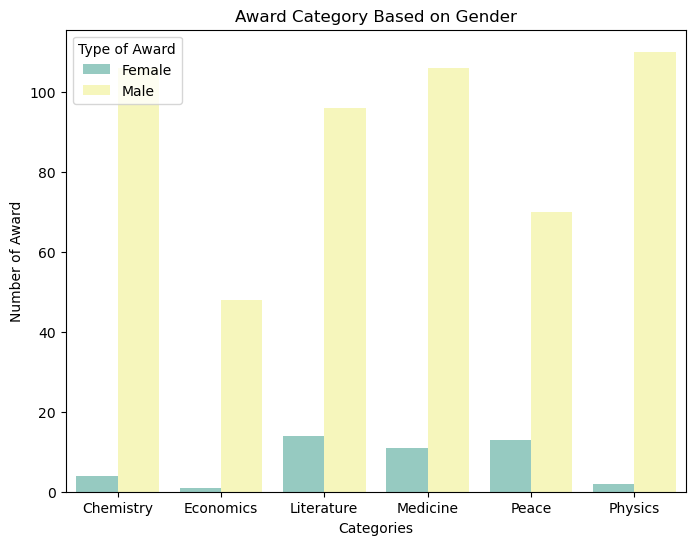

In [75]:
plt.figure(figsize=(8, 6))
sns.countplot(data=q5, x='category', hue='sex', palette="Set3")
plt.title('Award Category Based on Gender')
plt.xlabel('Categories')
plt.ylabel('Number of Award')
plt.legend(title='Type of Award',loc=2)

Comment:-Award Category Based on Gender-

In general, it can be seen that men received more awards in all categories. This means that men are more recognized and rewarded in fields such as science and literature. The literature category is one of the categories where women have won the most awards.
The number of female laureates in the Economics and Physics categories is quite low. This suggests that women have historically been underrepresented in these fields.
The Medicine category has slightly more female laureates than the other categories, but is still heavily male-dominated.
The Chemistry and Peace categories also have a low number of female laureates and are dominated by male laureates.
Overall, the graph reveals the unbalanced distribution of Nobel prizes between the sexes. Men win more prizes in most categories, while women win more prizes in some areas (especially literature). This may be due to historical, social and cultural factors.

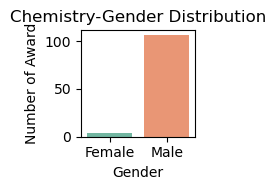

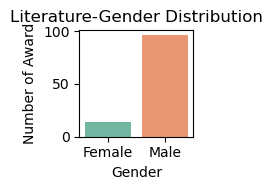

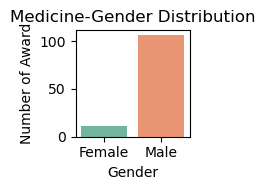

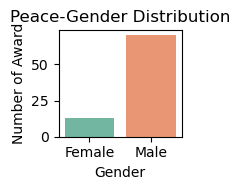

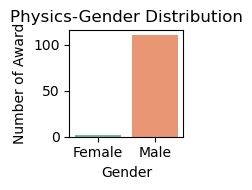

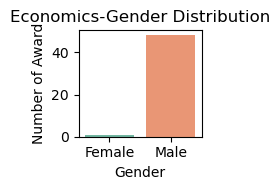

In [83]:
for category in df['category'].unique():
    category_data = q5[q5['category'] == category]
    
    plt.figure(figsize=(2, 2))
    sns.countplot(data=category_data, x='sex', palette='Set2')
    plt.title(f'{category}-Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Number of Award')
    plt.tight_layout()

plt.show()

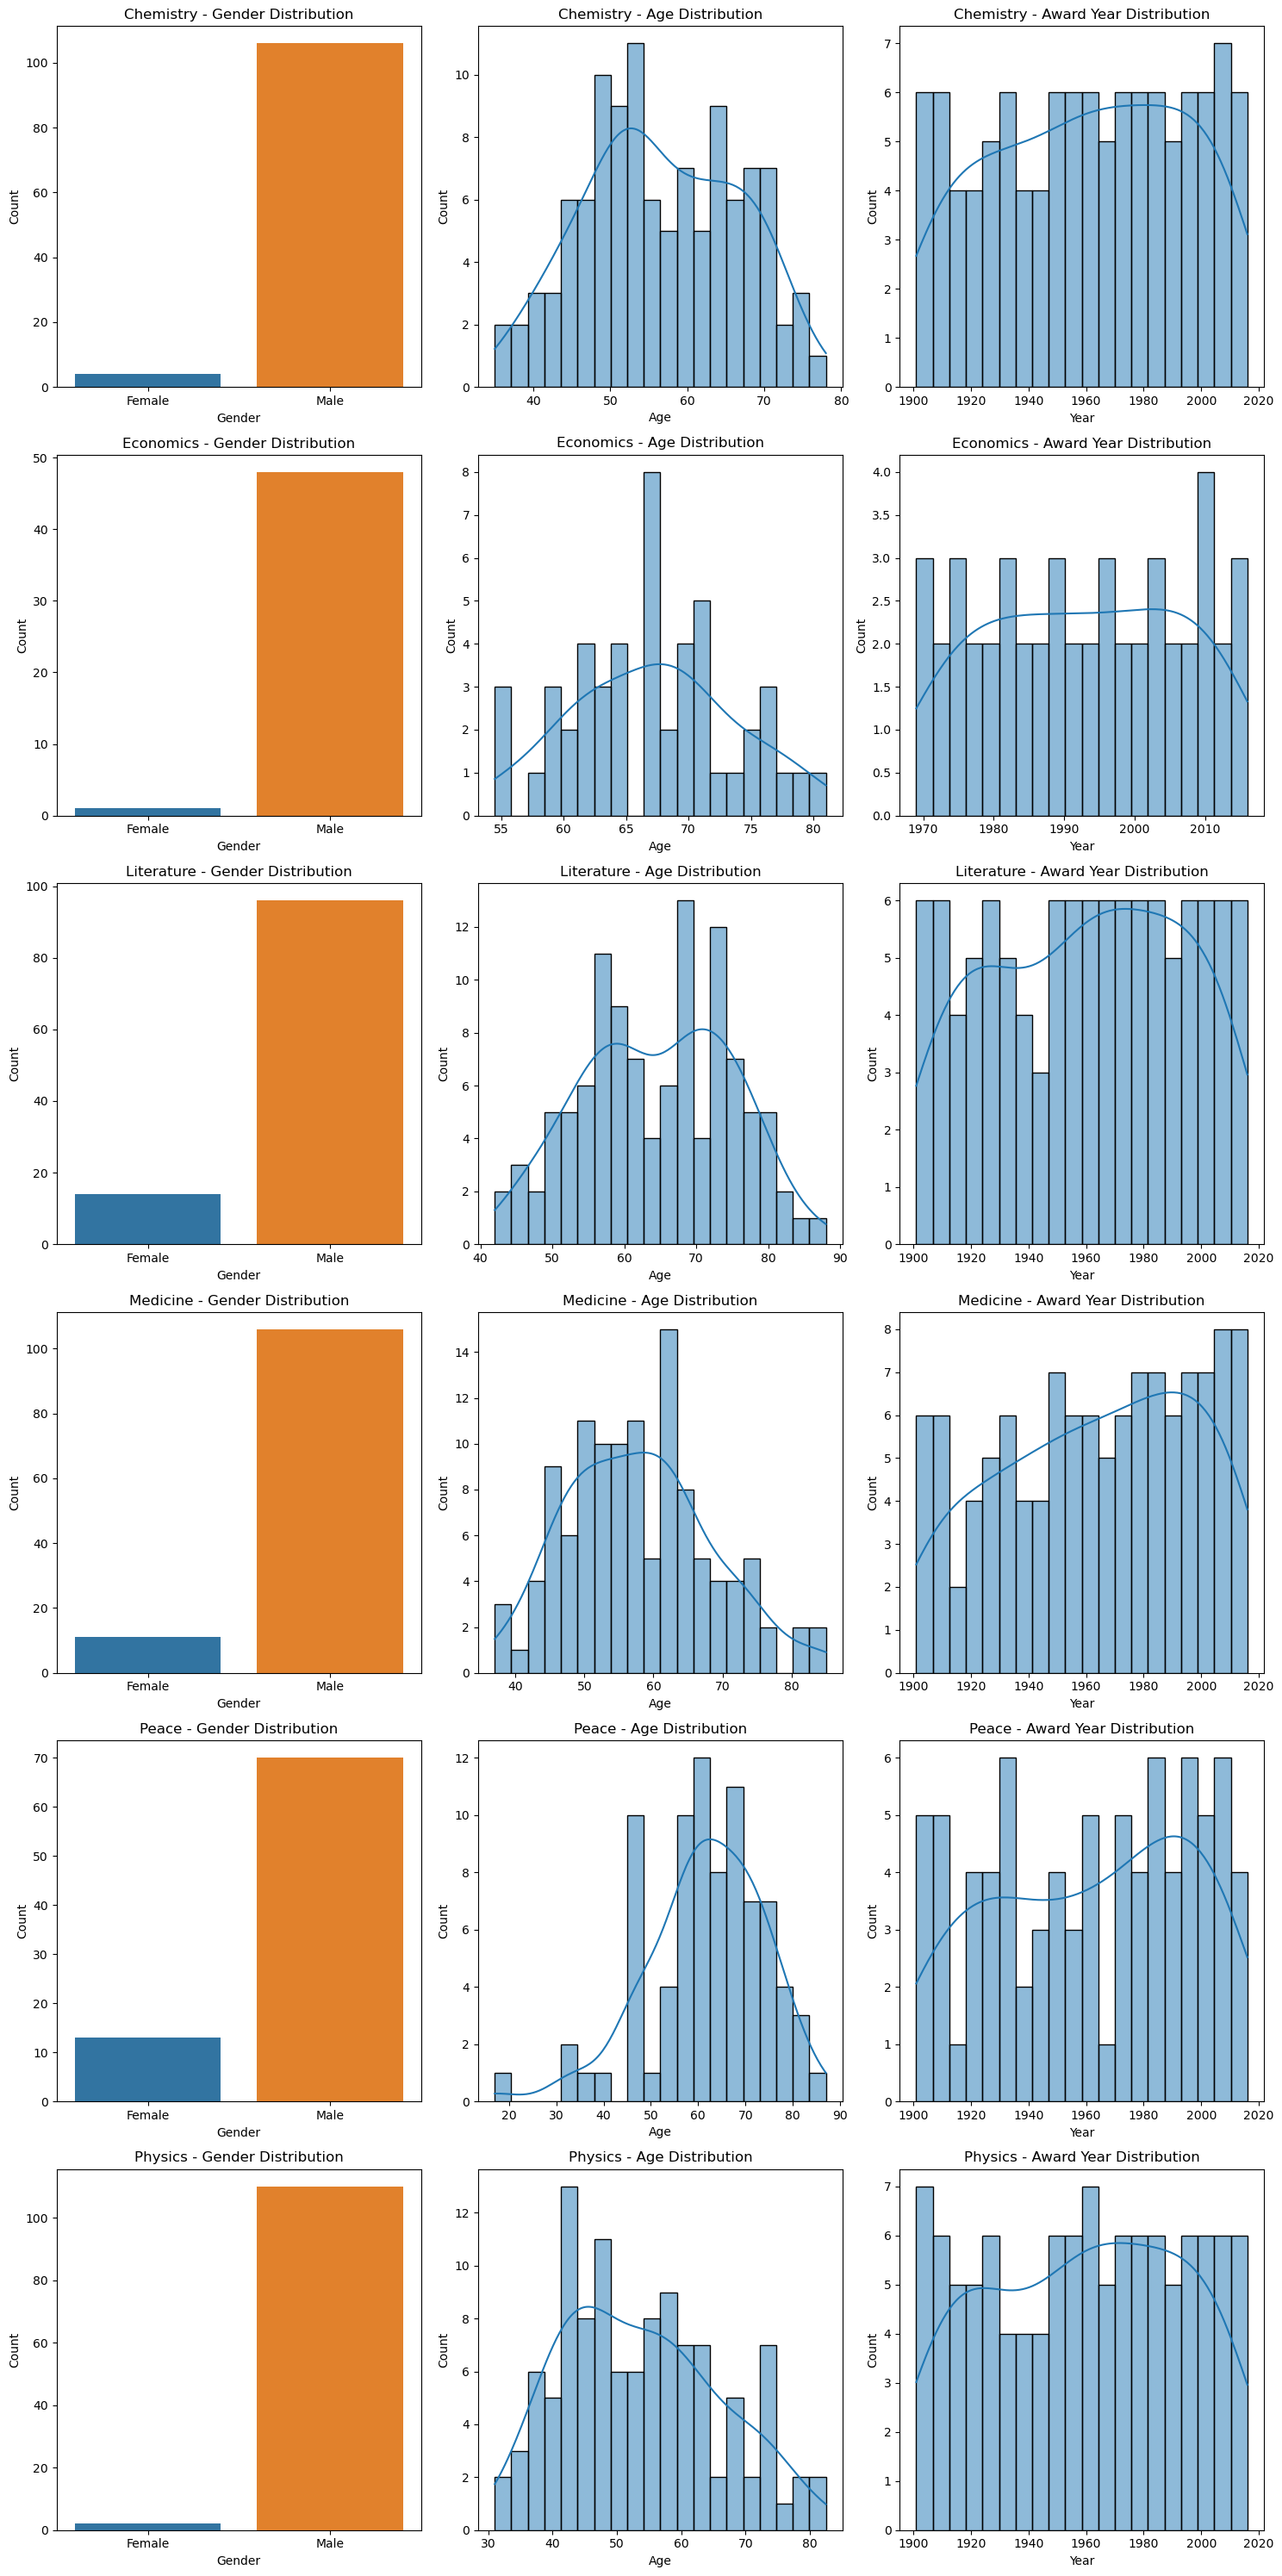

In [96]:
# Let's reach 6 different categories with a loop for separate visualisation of each award category.
categories = q5['category'].unique()

fig, axes = plt.subplots(len(categories), 3, figsize=(15, len(categories) * 5))

for i, category in enumerate(categories):
 
    category_data = q5[q5['category'] == category]
    
   
    sns.countplot(data=category_data, x='sex', ax=axes[i, 0])
    axes[i, 0].set_title(f'{category} - Gender Distribution')
    axes[i, 0].set_xlabel('Gender')
    axes[i, 0].set_ylabel('Count')
    

    category_data_without_nan = category_data.dropna(subset=['age'])
    sns.histplot(data=category_data_without_nan, x='age', bins=20, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'{category} - Age Distribution')
    axes[i, 1].set_xlabel('Age')
    axes[i, 1].set_ylabel('Count')
    
   
    sns.histplot(data=category_data, x='year', bins=20, kde=True, ax=axes[i, 2])
    axes[i, 2].set_title(f'{category} - Award Year Distribution')
    axes[i, 2].set_xlabel('Year')
    axes[i, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [150]:
df.groupby(["year"]).agg({"category":"count"}).sort_values(by="category",ascending=False)

,category
year,
2001,15
2014,13
2013,13
1996,13
2011,13
...,...
1919,4
1914,3
1924,3


In [168]:
df[df["year"]==1919][["category","full_name","birth_country"]]

,category,full_name,birth_country
93,Literature,Carl Friedrich Georg Spitteler,Switzerland
94,Medicine,Jules Bordet,Belgium
95,Peace,Thomas Woodrow Wilson,United States of America
96,Physics,Johannes Stark,Germany


#### _**6. Visualise the categories and countries of the Nobel Prize winners between 1938-1945 by visualising them. Interpret the visual according to the results.**_

In [87]:
q6=df.loc[(df['year'] >= 1938) & (df['year'] <= 1945),["category","birth_country"]]

In [88]:
q6.groupby(["category","birth_country"]).agg({"birth_country":"count"}).sort_values(by="category",ascending=False)

birth_country
category   birth_country                           
Physics    United States of America               1
           Italy                                  1
           Germany (Poland)                       1
           Austria-Hungary (Poland)               1
           Austria                                1
Peace      United States of America               1
Medicine   Germany                                1
           United States of America               3
           Scotland                               1
           Germany (Poland)                       1
           Denmark                                1
           Belgium                                1
           Australia                              1
Literature United States of America               1
           Russian Empire (Finland)               1
           Denmark                                1
           Chile                                  1
Chemistry  Austria-Hungary (Croatia)              1
           Russian Empire (Finland)               1
           Germany                                2
           Austria-Hungary (Hungary)              1
           Austria-Hungary (Austria)              1

In [89]:
grouped_df = q6.groupby(['category', 'birth_country']).size().reset_index(name='count')

In [186]:
grouped_df

,category,birth_country,count
0,Chemistry,Austria-Hungary (Austria),1
1,Chemistry,Austria-Hungary (Croatia),1
2,Chemistry,Austria-Hungary (Hungary),1
3,Chemistry,Germany,2
4,Chemistry,Russian Empire (Finland),1
5,Literature,Chile,1
6,Literature,Denmark,1
7,Literature,Russian Empire (Finland),1
8,Literature,United States of America,1
9,Medicine,Australia,1


In [ ]:
#Comparison of Number of Awards by Award Category and Country

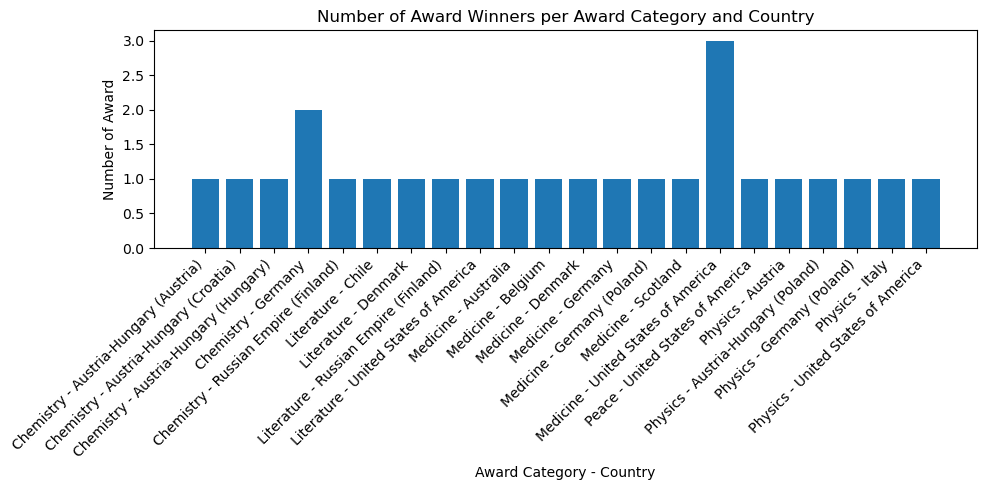

In [97]:
plt.figure(figsize=(10, 5))
plt.bar(grouped_df['category'] + ' - ' + grouped_df['birth_country'], grouped_df['count'])
plt.title('Number of Award Winners per Award Category and Country')
plt.xlabel('Award Category - Country')
plt.ylabel('Number of Award')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*During the 2nd world war, we see that America received the most awards in the field of medicine and Germany in the field of pharmaceuticals.*

#### _**7.Visualise and comment on the categories and countries of the Nobel Prize winners between 1947-1991.(A separate graph is required for each category)**_

In [58]:
df.loc[(df['year'] >=1947) & (df['year'] <= 1991),["category","birth_country","full_name"]]

,category,birth_country,full_name
232,Chemistry,United Kingdom,Sir Robert Robinson
233,Literature,France,André Paul Guillaume Gide
234,Medicine,Austria-Hungary (Czech Republic),Carl Ferdinand Cori
235,Medicine,Austria-Hungary (Czech Republic),"Gerty Theresa Cori, née Radnitz"
236,Medicine,Argentina,Bernardo Alberto Houssay
...,...,...,...
615,Literature,South Africa,Nadine Gordimer
616,Medicine,Germany,Erwin Neher
617,Medicine,Germany,Bert Sakmann
618,Peace,Burma (Myanmar),Aung San Suu Kyi


In [92]:
f7=df.loc[(df['year'] >=1947) & (df['year'] <= 1991),["category","birth_country"]]

In [93]:
f7

,category,birth_country
232,Chemistry,United Kingdom
233,Literature,France
234,Medicine,Austria-Hungary (Czech Republic)
235,Medicine,Austria-Hungary (Czech Republic)
236,Medicine,Argentina
...,...,...
615,Literature,South Africa
616,Medicine,Germany
617,Medicine,Germany
618,Peace,Burma (Myanmar)


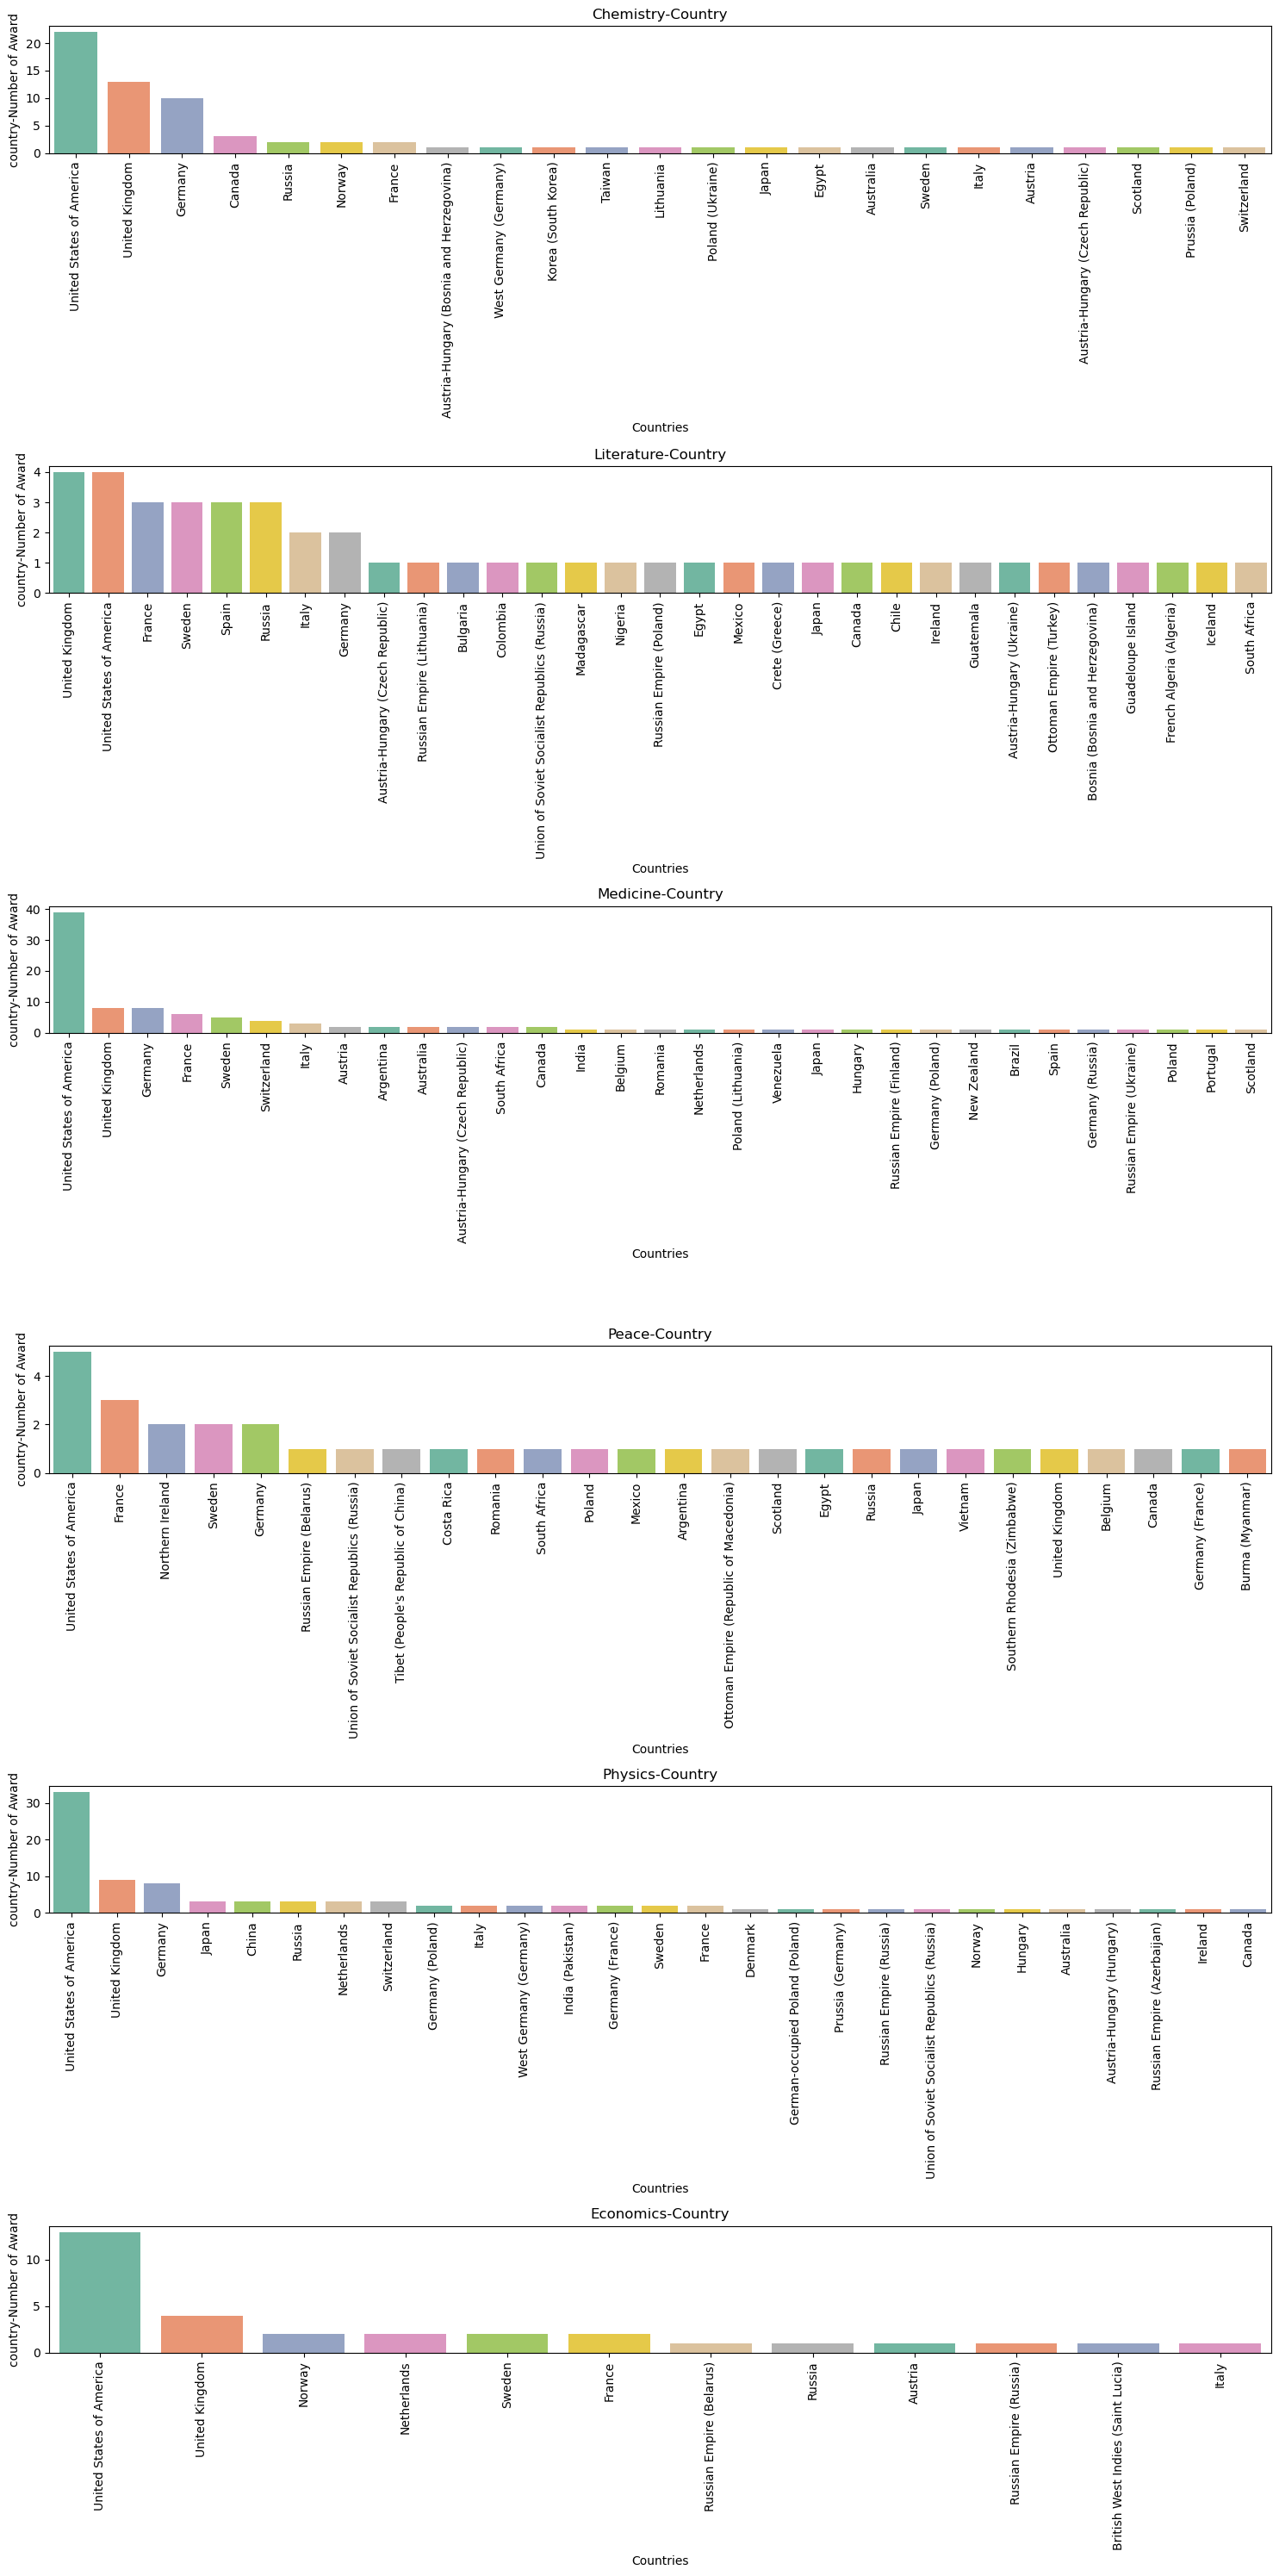

In [104]:
categories = f7['category'].unique()
fig, axes = plt.subplots(len(categories), 1, figsize=(15, len(categories) * 5))

for i, category in enumerate(categories):
    category_data = f7[f7['category'] == category]
    category_counts = category_data['birth_country'].value_counts()
    
    ax = axes[i]
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax, palette='Set2')
    ax.set_title(f'{category}-Country')
    ax.set_ylabel('country-Number of Award')
    ax.set_xlabel('Countries')
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [95]:
piv = f7.pivot_table(index='birth_country', columns='category', aggfunc='size', fill_value=0)
piv

category,Chemistry,Economics,Literature,Medicine,Peace,Physics
birth_country,,,,,,
Argentina,0,0,0,2,1,0
Australia,1,0,0,2,0,1
Austria,1,1,0,2,0,0
Austria-Hungary (Bosnia and Herzegovina),1,0,0,0,0,0
Austria-Hungary (Czech Republic),1,0,1,2,0,0
...,...,...,...,...,...,...
United Kingdom,13,4,4,8,1,9
United States of America,22,13,4,39,5,33
Venezuela,0,0,0,1,0,0


In [197]:
q7=df.groupby(['category', 'birth_country']).size().reset_index(name='prz_count').sort_values(by="prz_count",ascending=False)

In [ ]:
#1947-1991 (the period from the end of the Second World War until the dissolution of the Soviet Union after the Cold War)
#Distribution of Award Categeories

Text(0.5, 1.0, '1947-1991 Distribution of Award Categories')

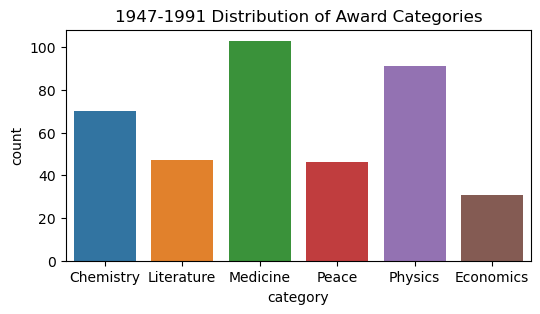

In [107]:
plt.figure(figsize=(6, 3))
sns.countplot(x=f7["category"], data=f7)
plt.title('1947-1991 Distribution of Award Categories')

Text(0.5, 1.0, '1901-2016 Distribution of Award Categories')

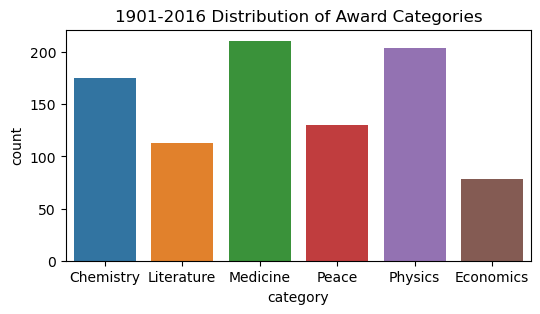

In [108]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["category"],data=df)
plt.title("1901-2016 Distribution of Award Categories")

In [ ]:
#Total number of Nobel Prize winners by category between 1947 and 1991

In [216]:
q7_=q7.groupby(["category","birth_country"]).agg({"prz_count":"sum"}).sort_values(by="prz_count", ascending=False)
q7_.reset_index(inplace=True)

In [217]:
q7_

,category,birth_country,prz_count
0,Medicine,United States of America,70
1,Physics,United States of America,66
2,Chemistry,United States of America,52
3,Economics,United States of America,43
4,Medicine,United Kingdom,23
...,...,...,...
258,Medicine,Russia,1
259,Medicine,Russian Empire (Finland),1
260,Economics,India,1
261,Chemistry,Russian Empire (Finland),1


Comment:-Distribution Award Categories-
    
The top 3 countries in the field of science and technology during the cold war period are the same in almost all graphs, such as the USA, Germany... However, we see that different countries are included in the graph in the field of peace. In addition, it is seen that the number of awards in the field of peace in the cold war period decreased compared to other years. 

#### *8. Visualise the countries and ages of people after 2000 in the categories of Chemistry, Literature, Peace, Physics and Medicine.(Separate visualisation is required for each category) Interpret the data.

In [110]:
filtered=df.loc[(df['year'] >=2000),["category","birth_country","age"]]

In [111]:
filtered

,category,birth_country,age
706,Chemistry,United States of America,64.0
707,Chemistry,New Zealand,73.0
708,Chemistry,Japan,64.0
709,Economics,United States of America,56.0
710,Economics,United States of America,63.0
...,...,...,...
906,Medicine,Japan,71.0
907,Peace,Colombia,65.0
908,Physics,United Kingdom,82.0
909,Physics,United Kingdom,65.0


In [231]:
filtered[filtered["category"]=="Literature"]["age"].mean()

68.70588235294117

In [232]:
filtered[filtered["category"]=="Peace"]["age"].mean()

57.88235294117647

In [222]:
filtered[filtered["category"]=="Peace"].value_counts

<bound method DataFrame.value_counts of     category               birth_country   age
715    Peace         Korea (South Korea)  75.0
729    Peace                         NaN   NaN
730    Peace          Gold Coast (Ghana)  63.0
743    Peace    United States of America  78.0
754    Peace                        Iran  56.0
766    Peace                       Kenya  64.0
778    Peace                         NaN   NaN
779    Peace                       Egypt  63.0
788    Peace  British India (Bangladesh)  66.0
789    Peace                         NaN   NaN
800    Peace                         NaN   NaN
801    Peace    United States of America  59.0
812    Peace                     Finland  71.0
825    Peace    United States of America  48.0
837    Peace                       China  55.0
847    Peace                     Liberia  73.0
848    Peace                     Liberia  39.0
849    Peace                       Yemen  32.0
860    Peace                         NaN   NaN
873    Peace        

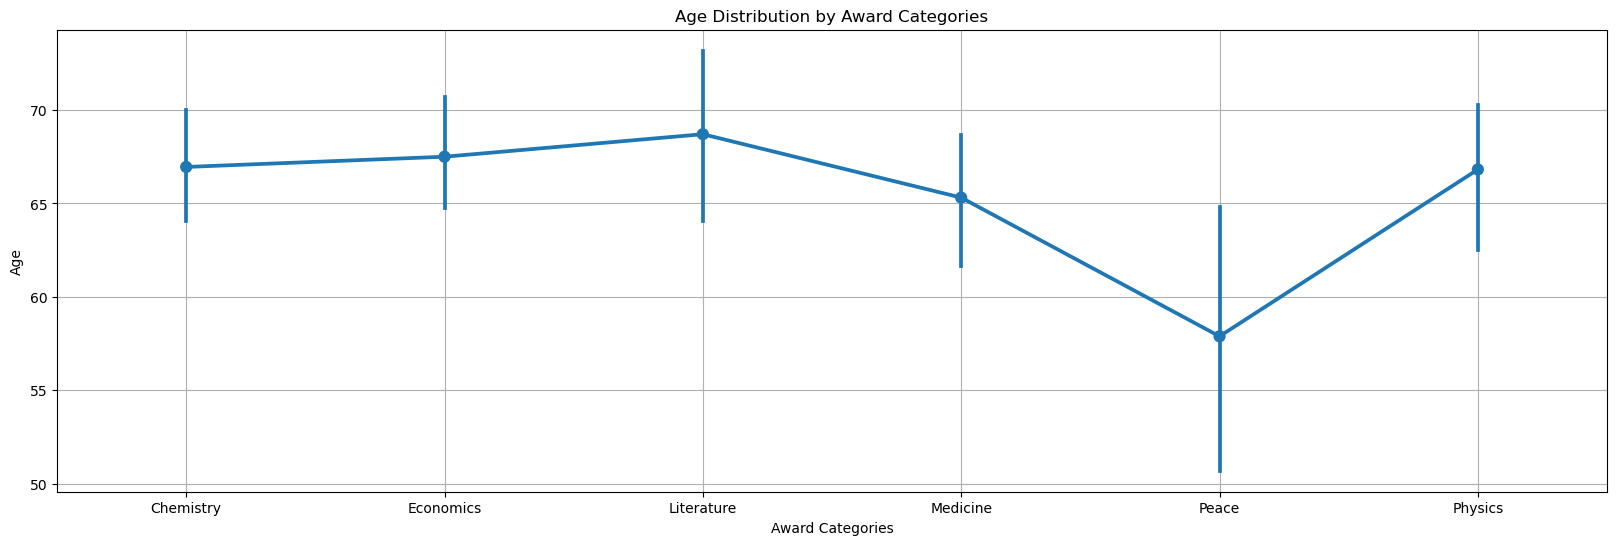

In [112]:
plt.figure(figsize=(20, 6))
sns.pointplot(data=filtered, x='category', y='age')
plt.title("Age Distribution by Award Categories")
plt.xlabel('Award Categories')
plt.ylabel('Age')
plt.grid(True)
plt.show()

When we look at the age distribution by category, the average age in chemistry is around 65 and the age distribution is relatively narrow.
In economics, the average age is again around 65, but the age distribution is slightly wider than in the other categories.
In the field of literature, the average age is around 67-68 and the age distribution is broad, similar to economics.
In medicine, the average age is around 65 and the age distribution is narrow, similar to the chemistry category.
The average age in peace is lower than in the other categories, around 63, and the age distribution is quite broad.
The average age is higher than in the other categories, around 70, with a wide age distribution.
In general, the age of the winners in the physics and literature categories is higher than in the other categories.
It is noteworthy that the age distribution in the peace category is quite wide. 
There are several possible reasons for the wide age distribution in the peace category.

The Peace Prize is usually awarded to individuals and organizations working in various fields that promote peace. These fields can include politics, activism, science, literature and more. This wide range of fields can result in participants from different age groups winning the award.
The prize can also be awarded to lifelong contributors to peace. Therefore, the prize can be awarded to both people who have achieved great success at a young age and older people who have worked for peace for many years.

In [274]:
a=filtered.groupby(['category', 'birth_country']).size()

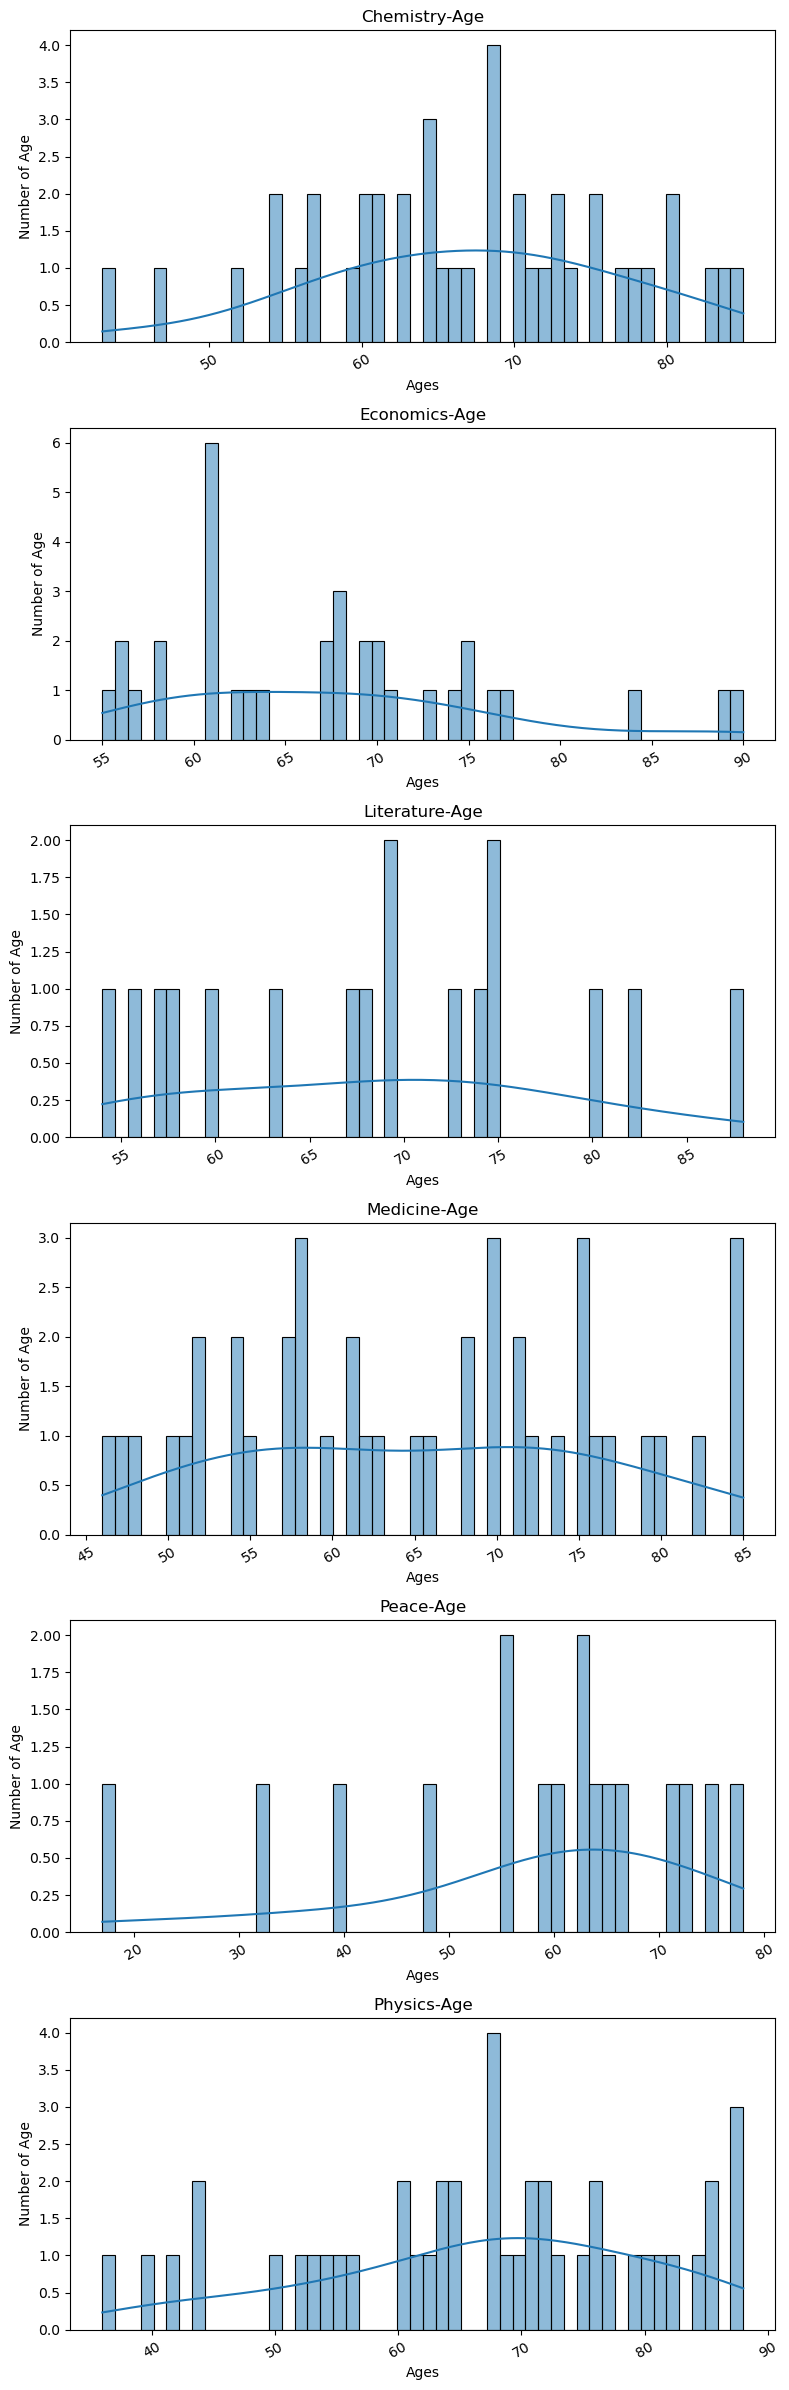

In [113]:
categories = filtered['category'].unique()
fig, axes = plt.subplots(len(categories), 1, figsize=(8, len(categories) * 4))

for i,category in enumerate(categories):
    category_data = filtered[filtered['category'] == category]
  
    ax = axes[i]
    sns.histplot(data=category_data, x='age', bins=50, kde=True,ax=ax)
    ax.set_title(f'{category}-Age')
    ax.set_ylabel('Number of Age')
    ax.set_xlabel('Ages')
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

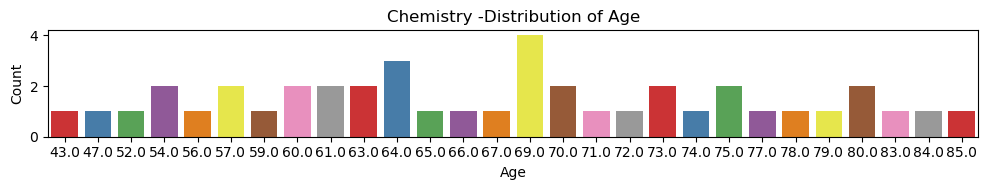

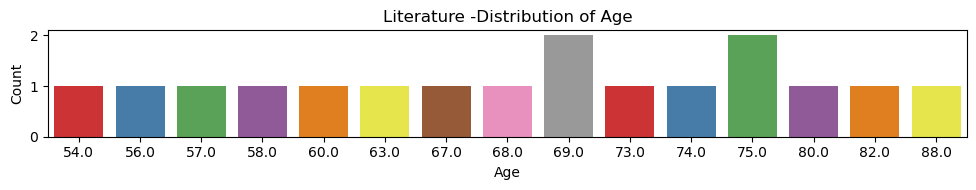

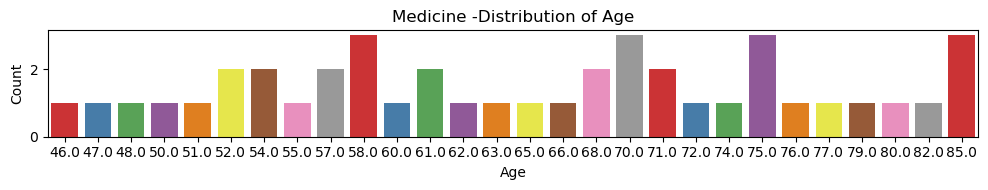

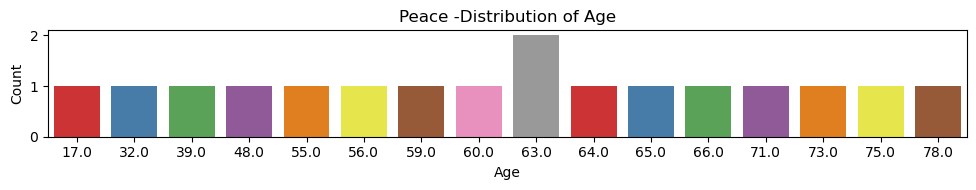

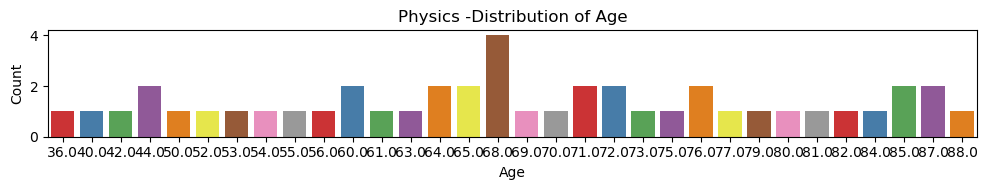

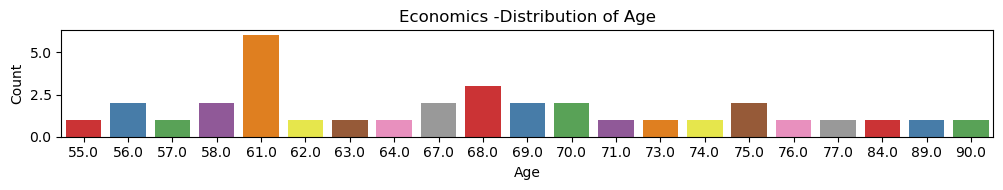

In [114]:
for category in df['category'].unique():
    category_data = filtered[filtered['category'] == category]
    
    plt.figure(figsize=(10, 2))
    sns.countplot(data=category_data, x='age', palette='Set1')
    plt.title(f'{category} -Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

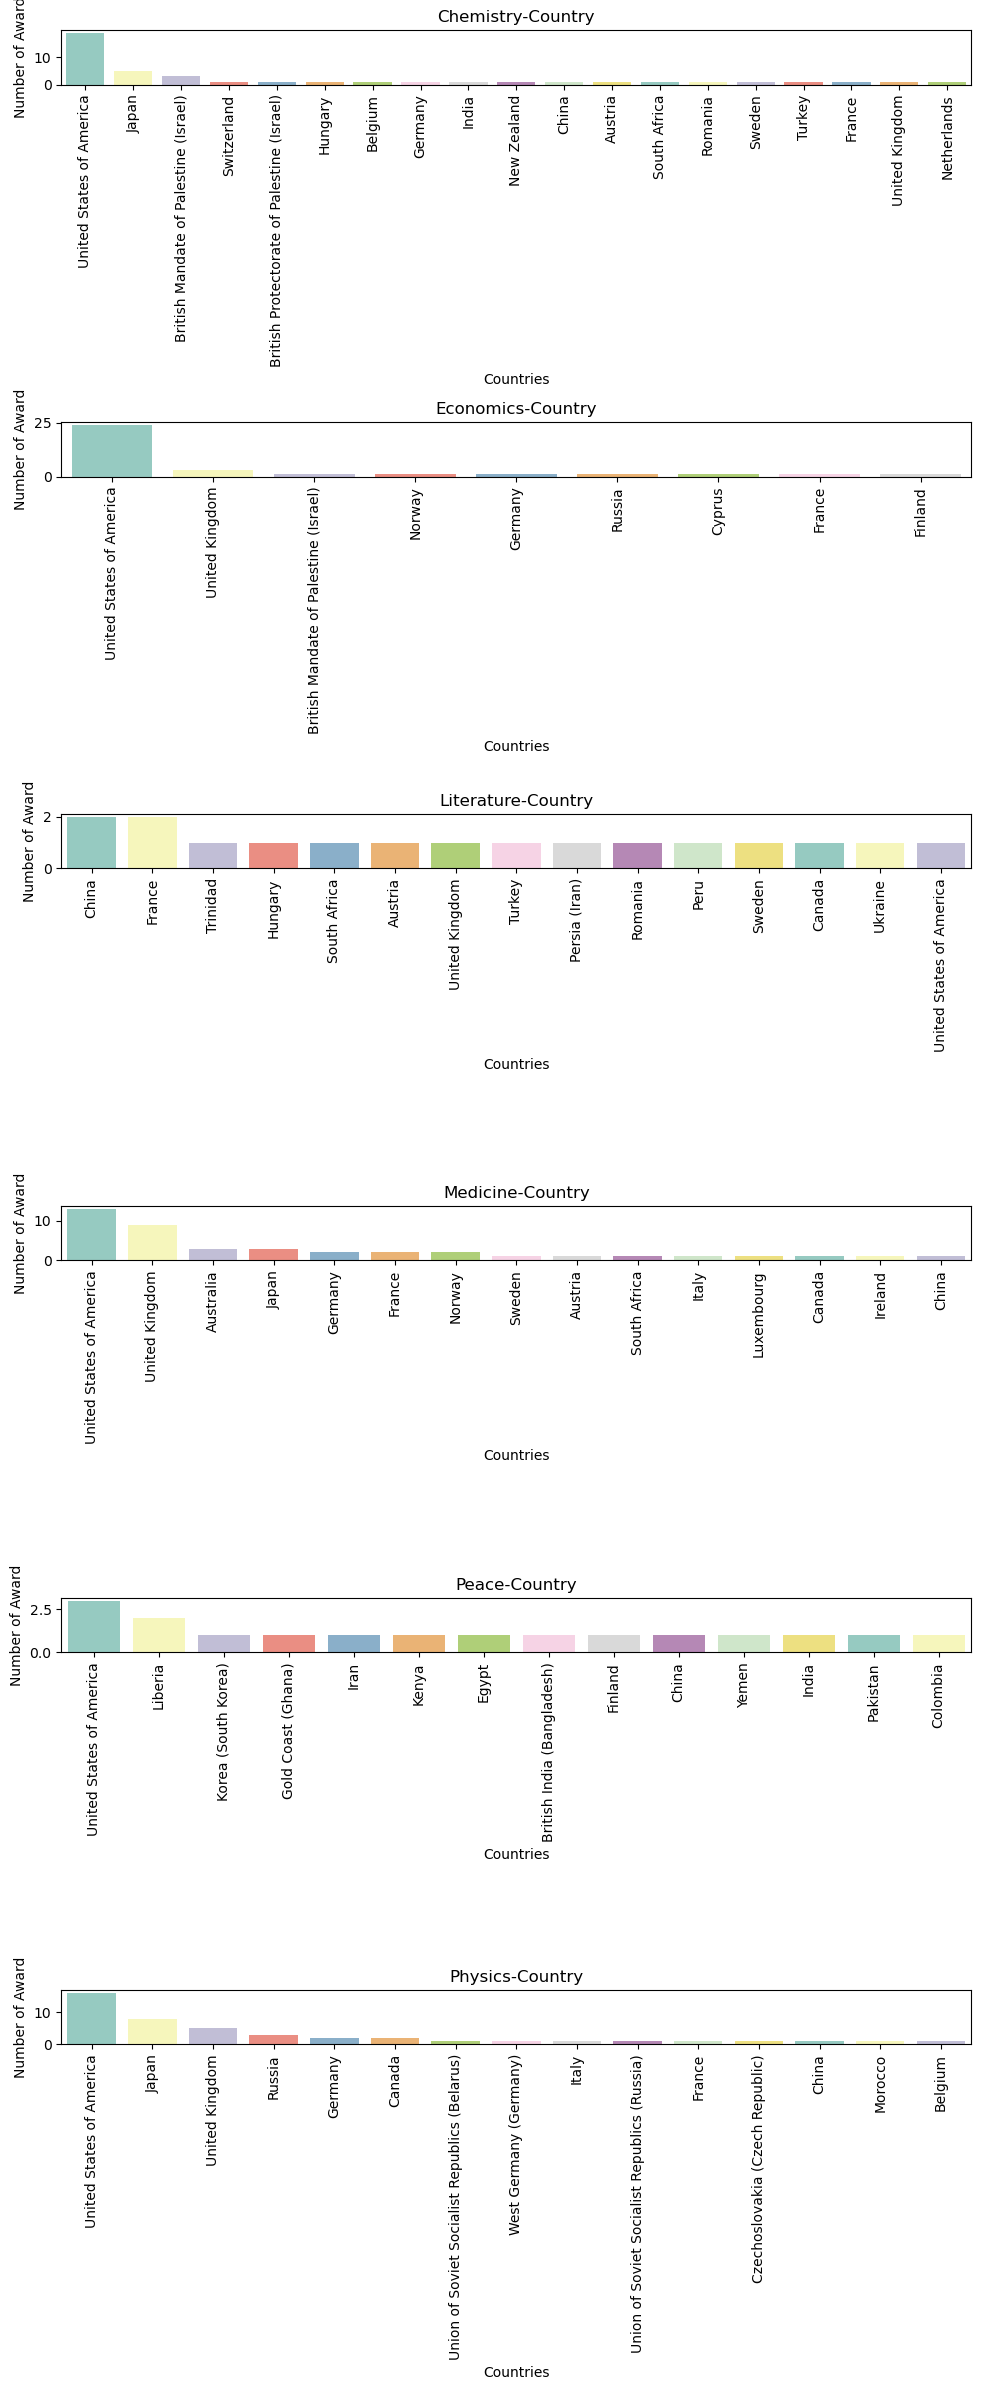

In [116]:

categories = filtered['category'].unique()
fig, axes = plt.subplots(len(categories), 1, figsize=(10, len(categories) * 4))

for i, category in enumerate(categories):
    category_data = filtered[filtered['category'] == category]
    category_counts = category_data['birth_country'].value_counts()
    
    ax = axes[i]
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax, palette='Set3')
    ax.set_title(f'{category}-Country')
    ax.set_ylabel('Number of Award')
    ax.set_xlabel('Countries')
    
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()
